# Omphemetse Mangope 

Advanced Machine Learning    
Assignment 6: Training Neural net using Negative Loglikelihood    
Due Date: 17 June 2020    


In [195]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
import numpy as np

In [196]:
data = pd.read_csv('weightdataset.csv',sep=';')
data.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [197]:
x = scale(data.Weight) # Data scaling
y = scale(data.Height)  # Data Scaling

w_input = np.random.random(2) # Randomly assigning weights
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.3) # Splitting data into 30% test and 70% train

# Functions 

In [198]:
def des(x):   # Design matrix for x values
    n = len(x)
    X = np.c_[np.ones(n), x]
    return(X)
#Please note: Since the bias term is 1, it is treated as an x values in this case which,
#is just ones throughou the whole observations

def hidden(p,w_in): # hidden node computation
    h = p.dot(w_in)
    return(h)

def sigmoid(x): # Sigmoid Function
    return(1/(1 + np.exp(-x)))

def der_sigmoid(x):
    return(sigmoid(x) * (1 - sigmoid(x)))

def y_w(x,w): # Derivative of y_pred with respect to weights
    return((1/(1 + np.exp(-x*w)))*(1/(1 + np.exp(-x*w))) * x)

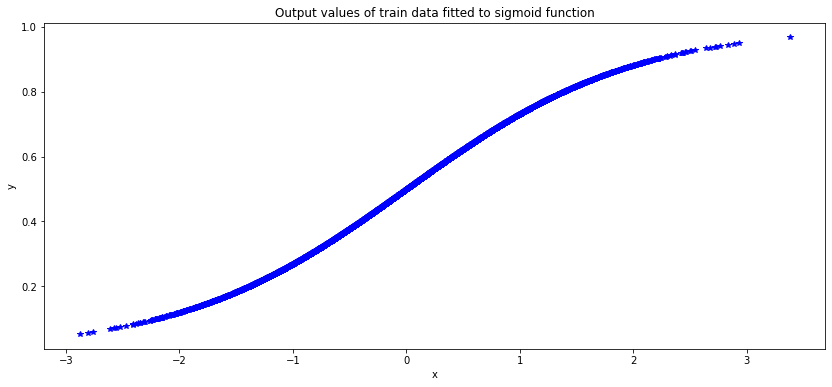

In [205]:
X_train = des(x_train) # Fitting training data to design Matrix
X_test = des(x_test) # Fitting testing data to design matrix

u11 = hidden(X_train,w_input) # Calculating the output of the hidden without sigmoid
o11 = sigmoid(X_train) # Output of the sigmoid function, note: 011=y_pred

derivative = y_w(X_test,w_input) # Derivative of y_pred with respect to w

# Sigmoid function has been used to squash the values of y_train to lie between 0 and 1
# Therefore, the data shows that the data solution lies between zero and therefore, the solution can be chosen between 0 and 1

plt.figure(figsize=(14,6))
plt.plot(X_train, o11, 'b*')
plt.title("Output values of train data fitted to sigmoid function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [206]:
epochs = 100 # Number of iterations 
lr = 0.001 # learning rate
y_pred = sigmoid(X_test) # prediction


def optimize(y_i,y_pred,w,x,epochs,lr, derivative):
    
    cost = []
    weights = []

    
    nll = 0
    
    n = len(x)
    
    for i in range(epochs):
        
        
    
        y_i = y_i.reshape(len(y_i),1) # reshaping y values to be to have n x 1 dimensions 
        
        nll = -np.sum((y_i *np.log(w) + (1 - y_i)*np.log(1 - w))) # negative Loglikelihood cost function
        err = derivative * nll # Backpropagation. derivative of sigmoid is defined under functions section above
        cost.append(err[-1])
        
        
       
        
        w = w - (lr*(1/n)*sum(y_pred - y_i))
        weights.append(w)
        
    return(cost, weights)

In [207]:
error,updated_weights = optimize(y_test,y_pred,w_input,X_test,epochs,lr,der_sigmoid(X_test))
weights = updated_weights[-1]


In [208]:
weights # weights updated 

array([0.85247061, 0.8660491 ])

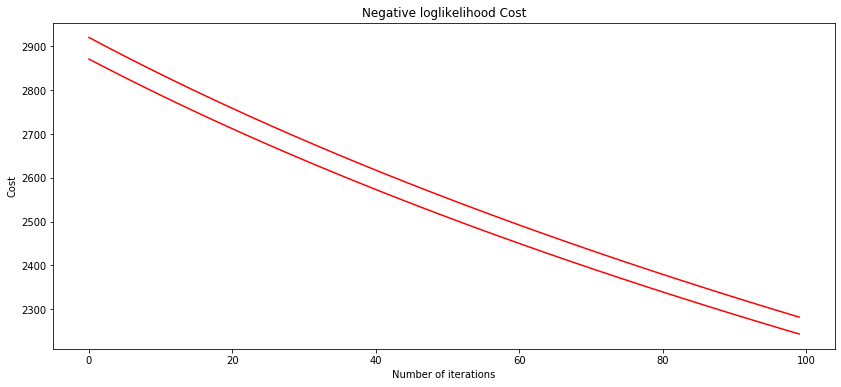

In [209]:
plt.figure(figsize=(14,6))
plt.plot(error, color = 'r')
plt.title('Negative loglikelihood Cost')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()